In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold, SelectKBest, r_regression, RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
XTRAIN = pd.read_csv("pc_X_train.csv")
YTRAIN = pd.read_csv("pc_y_train.csv")
testX = pd.read_csv("pc_X_test.csv")

XTRAIN.drop(['id'], axis=1, inplace=True)
YTRAIN.drop(['id'], axis=1, inplace=True)
testX.drop(['id'], axis=1, inplace=True)

In [3]:
varianceSelected = VarianceThreshold()
x_train_variance_selected = varianceSelected.fit_transform(XTRAIN)
featuresOutV = varianceSelected.get_feature_names_out()
x_train_variance_selected = pd.DataFrame(x_train_variance_selected, columns=featuresOutV)

x_test_variance_selected = pd.DataFrame(varianceSelected.transform(testX), columns = featuresOutV)

kBest = SelectKBest(r_regression, k=350)
x_train_k_best = kBest.fit_transform(x_train_variance_selected, YTRAIN)
featuresOutK = kBest.get_feature_names_out()
x_train_k_best = pd.DataFrame(x_train_k_best, columns=featuresOutK)

x_test_k_best = pd.DataFrame(kBest.transform(x_test_variance_selected), columns=featuresOutK)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
x_train_k_best

,mean_down_time,std_down_time,max_down_time,sum_down_time,mean_up_time,std_up_time,max_up_time,sum_up_time,mean_length_activity,std_length_activity,...,change_11_count,change_12_count,change_12_mean,change_12_std,change_14_count,change_14_mean,change_14_std,count_action_time_grade2,max_cursor_grade2,max_word_count_grade2
0,1.034313e+06,485886.146513,1897766.0,2.146201e+09,1.034428e+06,485882.738602,1897888.0,2.146437e+09,5.604819,1.865015,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0000,4.0,5.0,6.0
1,8.831101e+05,449458.736461,1799921.0,5.319855e+09,8.832070e+05,449458.075056,1800028.0,5.320439e+09,5.753154,1.933647,...,0.0,0.0,0.000000,0.000000,5.0,0.00083,0.0288,12.0,14.0,14.0
2,7.466693e+05,422263.660049,1784840.0,4.836177e+09,7.467595e+05,422264.140695,1784841.0,4.836761e+09,6.297977,2.538673,...,0.0,4.0,0.000618,0.024845,0.0,0.00000,0.0000,12.0,12.0,12.0
3,9.445934e+05,525116.282094,1855277.0,3.076541e+09,9.447333e+05,525110.448774,1855454.0,3.076996e+09,5.393614,1.571532,...,0.0,2.0,0.000614,0.024776,0.0,0.00000,0.0000,6.0,9.0,8.0
4,5.856043e+05,271637.642717,1754492.0,1.856951e+09,5.857008e+05,271643.202952,1754540.0,1.857257e+09,5.559445,1.708906,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0000,6.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,8.489734e+05,498248.440477,1801516.0,3.885751e+09,8.490789e+05,498239.581432,1801614.0,3.886234e+09,6.736509,2.463112,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0000,9.0,5.0,5.0
1972,1.164593e+06,490107.742542,1914090.0,4.029493e+09,1.164676e+06,490106.021122,1914238.0,4.029780e+09,7.144798,3.164857,...,0.0,2.0,0.000578,0.024039,0.0,0.00000,0.0000,6.0,3.0,4.0
1973,8.536839e+05,364856.690314,1577834.0,1.905422e+09,8.537940e+05,364855.112393,1577895.0,1.905668e+09,6.121864,2.439850,...,4.0,0.0,0.000000,0.000000,0.0,0.00000,0.0000,4.0,5.0,5.0
1974,8.579854e+05,520897.668385,1797367.0,5.612082e+09,8.580722e+05,520888.996206,1797464.0,5.612651e+09,5.562605,1.847786,...,0.0,1.0,0.000153,0.012365,0.0,0.00000,0.0000,13.0,18.0,19.0


In [5]:
Xcorr = x_train_k_best.corr()
Xcorr.style.background_gradient(cmap='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

In [6]:
cols = np.full((Xcorr.shape[0],), True, dtype=bool)
for i in range(Xcorr.shape[0]):
  for j in range(i+1, Xcorr.shape[0]):
    if 0.8 <= Xcorr.iloc[i,j]:
      if cols[j]:
        cols[j] = False
selected = x_train_k_best.columns[cols]
X_trainK = x_train_k_best[selected]

Xcorr1 = X_trainK.corr()
Xcorr1.style.background_gradient(cmap='coolwarm')

,mean_down_time,std_down_time,max_down_time,sum_down_time,mean_length_activity,std_length_down_event,std_length_text_change,mean_length_activity-length_down_event,std_length_activity-length_down_event,mean_length_activity/length_down_event,max_length_activity/length_down_event,mean_length_activity-length_text_change,mean_length_activity/length_text_change,max_length_activity/length_text_change,mean_length_down_event-length_up_event,std_length_down_event-length_up_event,max_length_down_event/length_text_change,std_cursor_position_change1,max_cursor_position_change1,sum_cursor_position_change1,sum_free_time5,std_action_time,count_action_time_percent,activity_3_count,activity_4_count,activity_5_count,event_3_count,event_5_count,event_6_count,event_7_count,event_8_count,event_8_mean,event_9_count,event_11_count,event_13_count,event_14_count,event_15_count,event_16_count,event_17_count,event_18_count,event_19_count,event_20_count,event_20_std,event_21_count,event_22_count,event_23_count,event_24_count,event_25_count,event_26_count,event_29_count,event_29_mean
mean_down_time,1.000000,0.555150,0.656763,0.568564,0.138443,0.141811,0.005404,-0.045967,-0.009461,-0.169825,0.046429,0.134386,0.010411,-0.002403,-0.016177,0.015973,-0.000056,-0.205156,-0.114559,0.102526,0.297479,0.017210,0.061470,0.078082,0.032902,0.037718,0.028846,0.035097,0.115285,0.088934,0.048300,-0.098105,0.061171,0.031658,0.030280,0.050244,-0.001402,0.061025,0.023619,0.020976,0.006688,0.001820,0.009920,0.031775,-0.023334,0.014517,0.003916,0.040603,0.012864,0.012147,0.018082
std_down_time,0.555150,1.000000,0.481959,0.585829,0.174909,0.227211,0.026943,-0.097873,-0.010778,-0.239686,0.062229,0.201359,0.056308,0.002708,-0.007552,0.007306,-0.003191,-0.049093,0.030453,0.203239,0.673386,0.025858,0.032475,0.146738,0.037478,0.030498,0.064527,0.089192,0.149234,0.250250,0.163650,-0.063136,0.075429,0.088919,0.112043,0.068255,0.006182,0.051978,0.092788,0.057123,0.061978,0.050454,0.048307,0.021397,0.001684,0.082650,0.055656,0.070718,0.060213,-0.012783,-0.039844
max_down_time,0.656763,0.481959,1.000000,0.407422,0.071394,0.095389,0.014159,-0.039802,-0.012430,-0.097131,0.022528,0.073075,0.015520,-0.000459,-0.013277,0.013169,-0.002259,0.043063,0.049301,0.054775,0.730165,0.030788,0.012814,0.080804,0.009010,0.052239,0.001351,0.115998,0.075283,0.082907,0.036121,-0.043843,0.012923,0.028513,0.011084,0.027550,0.000939,0.025826,0.030772,0.004988,0.022717,0.021663,0.042017,0.014415,0.016457,0.039682,0.059097,0.022409,0.012147,-0.005731,-0.015452
sum_down_time,0.568564,0.585829,0.407422,1.000000,0.325597,0.292824,0.089824,-0.013190,0.071849,-0.331756,0.170261,0.307324,0.045805,0.009033,0.010743,-0.010759,0.022045,0.006729,0.204022,0.506192,0.351343,0.025742,0.073204,0.215070,0.041109,-0.006416,0.269090,0.074739,0.296092,0.534183,0.545627,0.107703,0.169946,0.118766,0.336292,0.101800,0.044930,0.085366,0.258462,0.278699,0.211779,0.098933,0.066975,0.083619,0.065411,0.157921,0.064848,0.151358,0.228904,0.055840,-0.002573
mean_length_activity,0.138443,0.174909,0.071394,0.325597,1.000000,0.643721,0.109048,0.421345,0.442032,-0.821088,0.088955,0.487509,-0.467200,0.014660,0.011984,-0.011874,-0.040563,-0.025084,-0.050132,-0.107344,0.105187,0.019487,0.145108,0.101374,0.022386,0.029184,0.543318,0.161666,0.553719,0.009747,0.013289,-0.151983,0.381830,0.018339,-0.001567,0.146251,0.142035,0.196033,0.038168,0.052435,0.003550,0.023328,0.028538,0.025937,0.059971,0.006976,0.035887,0.052010,0.029590,0.011006,-0.012908
std_length_down_event,0.141811,0.227211,0.095389,0.292824,0.643721,1.000000,0.090082,-0.276037,-0.053868,-0.754990,0.084001,0.707584,0.182146,0.031574,0.005360,-0.005191,0.039804,0.018091,-0.014195,-0.130640,0.174206,0.035467,0.063649,0.121595,0.021574,0.021355,-0.026739,0.210555,0.377010,0.004132,0.064512,-0.086113,0.186594,0.044245,0.001632,0.109238,0.169825,0.127232,0.020577,0.069623,0.008301,0.067925,0.097362,0.104422,0.074452,0.043579,0.085837,0.051465,0.039366,0.006086,-0.016324
std_length_text_change

In [7]:
X_trainK['max_down_time'].corr(X_trainK['max_length_activity/length_text_change'])

-0.0004589597816918714

In [8]:
for col in X_trainK.columns:
  if X_trainK[col].std() == 0.0:
    X_trainK.drop(columns=[col], inplace=True)

In [9]:
ldaK = LinearDiscriminantAnalysis()
ytrain_doubled = YTRAIN*2
LDA = pd.DataFrame(ldaK.fit_transform(X_trainK, ytrain_doubled), columns=ldaK.get_feature_names_out())


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
min_max_scaler = MinMaxScaler()
xtrain_mm = pd.DataFrame(min_max_scaler.fit_transform(LDA), columns=min_max_scaler.get_feature_names_out())


In [14]:
X_train, x_val, y_train, y_val = train_test_split(xtrain_mm, YTRAIN)


-0.006966241283180597 0.004388087249128317
Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'alpha': 0.001}
0.7485699483764566


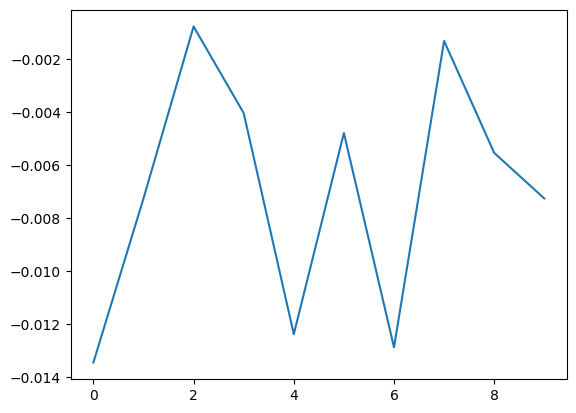

In [15]:
from sklearn.linear_model import Lasso
lasso_reg = linear_model.Lasso()
scores = cross_val_score(lasso_reg, xtrain_mm, YTRAIN, cv=10)
plt.plot(scores)
print(scores.mean(), scores.std())

hyper_params = {'alpha':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model_cv1 = GridSearchCV(estimator = lasso_reg,
                        param_grid = hyper_params,
                        scoring = 'neg_mean_squared_error',
                        cv = 10,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv1.fit(X_train, y_train)
print(model_cv1.best_params_)
y_pred = model_cv1.predict(x_val)
print(math.sqrt(mean_squared_error(y_val, y_pred)))

0.4929121734939378 0.052007125133498554
Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'n_features_to_select': 2}
0.7465066937953098


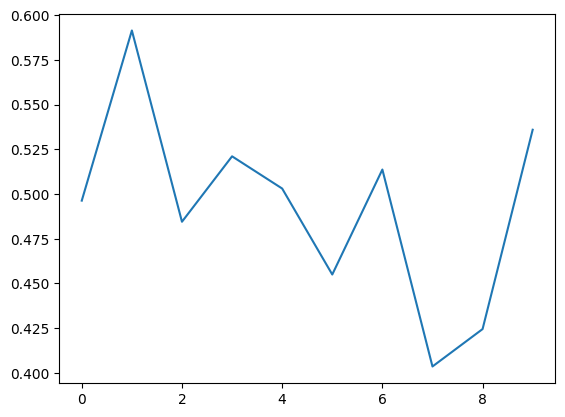

In [17]:
lasso_reg = linear_model.Lasso(alpha=0.001)
scores = cross_val_score(lasso_reg, xtrain_mm, YTRAIN, cv=10)
plt.plot(scores)
print(scores.mean(), scores.std())
rfe = RFE(lasso_reg)
hyper_params = [{'n_features_to_select': list(range(1,5))}]
model_cv1 = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring = 'neg_mean_squared_error',
                        cv = 10,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv1.fit(X_train, y_train)
print(model_cv1.best_params_)
y_pred = model_cv1.predict(x_val)
print(math.sqrt(mean_squared_error(y_val, y_pred)))

In [18]:
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(x_val)
print(math.sqrt(mean_squared_error(y_val, y_pred)))

0.7485699483764566
